In [28]:
# 1. IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


In [29]:
# 2. DATA LOADING & PREPROCESSING
data = pd.read_csv("Uber-Jan-Feb-FOIL.csv")

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Create new features from date
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['weekday'] = data['date'].dt.weekday

# Encode base number as numeric feature
le = LabelEncoder()
data['base_encoded'] = le.fit_transform(data['dispatching_base_number'])

# Select features & target
X = data[['active_vehicles', 'day', 'month', 'weekday', 'base_encoded']]
y = data['trips']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


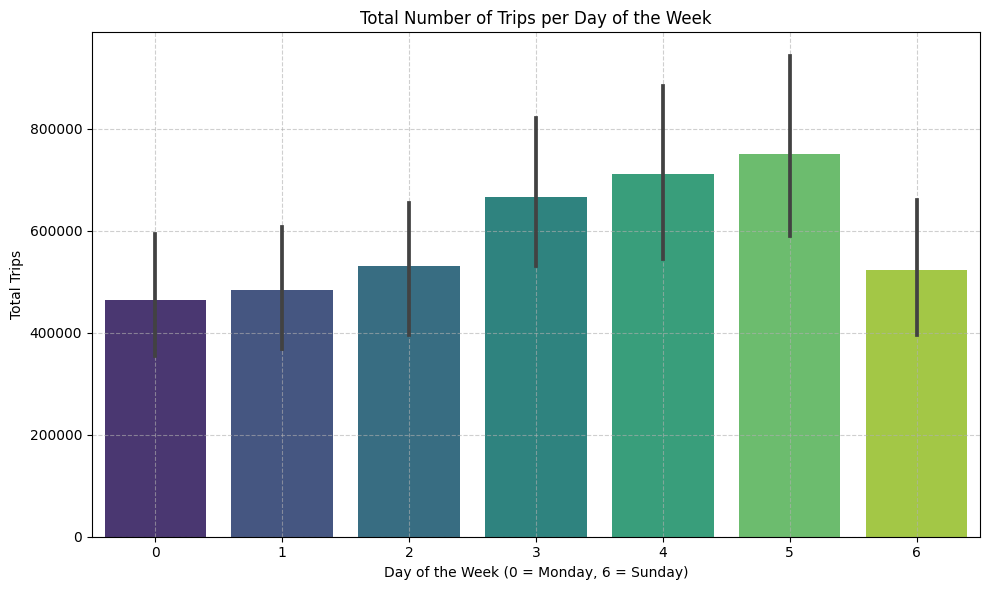

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='trips', data=data, estimator=sum, palette='viridis')
plt.title("Total Number of Trips per Day of the Week")
plt.xlabel("Day of the Week (0 = Monday, 6 = Sunday)")
plt.ylabel("Total Trips")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [31]:
data['hour'] = pd.to_datetime(data['date']).dt.hour


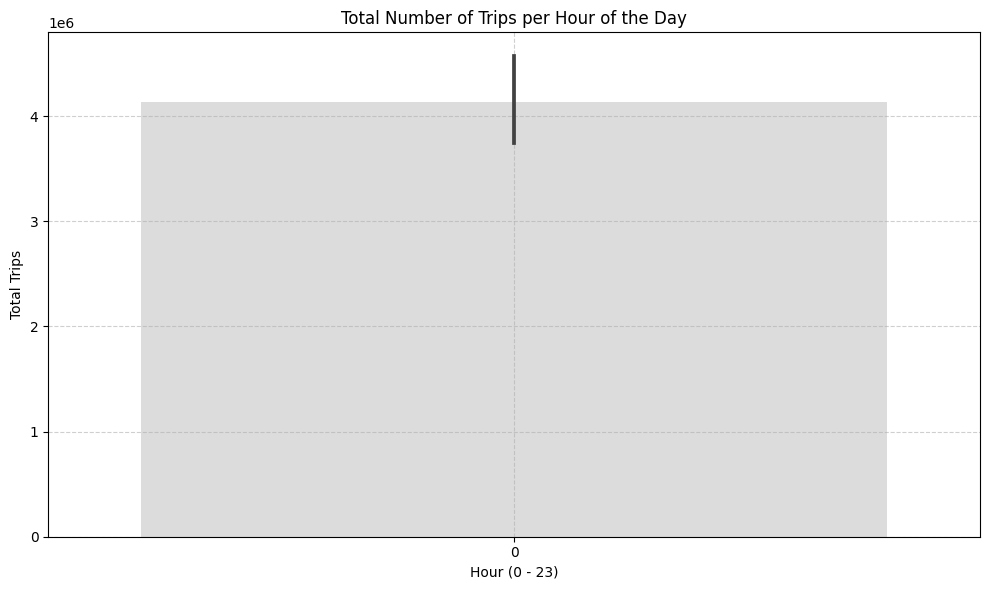

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='trips', data=data, estimator=sum, palette='coolwarm')
plt.title("Total Number of Trips per Hour of the Day")
plt.xlabel("Hour (0 - 23)")
plt.ylabel("Total Trips")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [33]:
# 3. MODEL INITIALIZATION
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

# Dictionary to store metrics
metrics = {}


In [34]:
# 4. MODEL TRAINING & EVALUATION
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    mape = mean_absolute_percentage_error(y_test, preds)
    
    metrics[name] = {"MSE": mse, "MAE": mae, "MAPE": mape}


In [35]:
# 5. CREATE METRICS DATAFRAME
results_df = pd.DataFrame(metrics).T
results_df = results_df.round(2)
print(results_df)


                          MSE     MAE  MAPE
Random Forest      1557876.27  898.22  0.08
Gradient Boosting  1310069.02  790.54  0.07
XGBoost            1701515.72  831.05  0.07


<Figure size 1200x600 with 0 Axes>

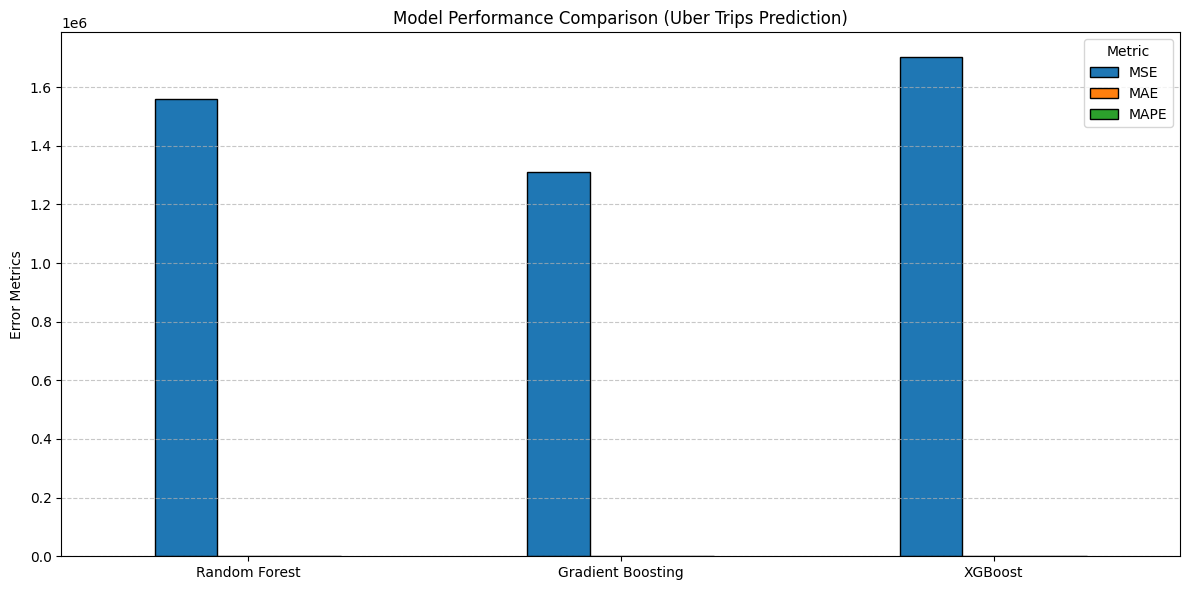

In [36]:
# 6. VISUALIZATION OF ALL MODELS AT ONCE
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', figsize=(12, 6), edgecolor='black')
plt.title("Model Performance Comparison (Uber Trips Prediction)")
plt.ylabel("Error Metrics")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title="Metric")
plt.show()


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Features and Target
X = data[['active_vehicles', 'day', 'month', 'weekday', 'base_encoded']]
y = data['trips']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict the number of trips on test data
y_pred = rf_model.predict(X_test)


In [38]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 1557876.27
R² Score: 0.99


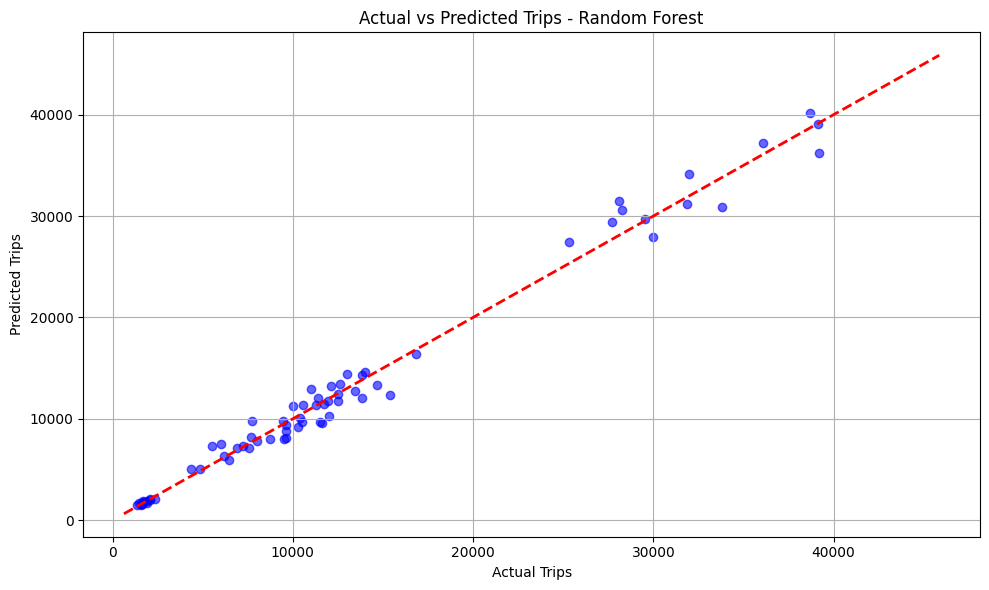

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Actual vs Predicted Trips - Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()


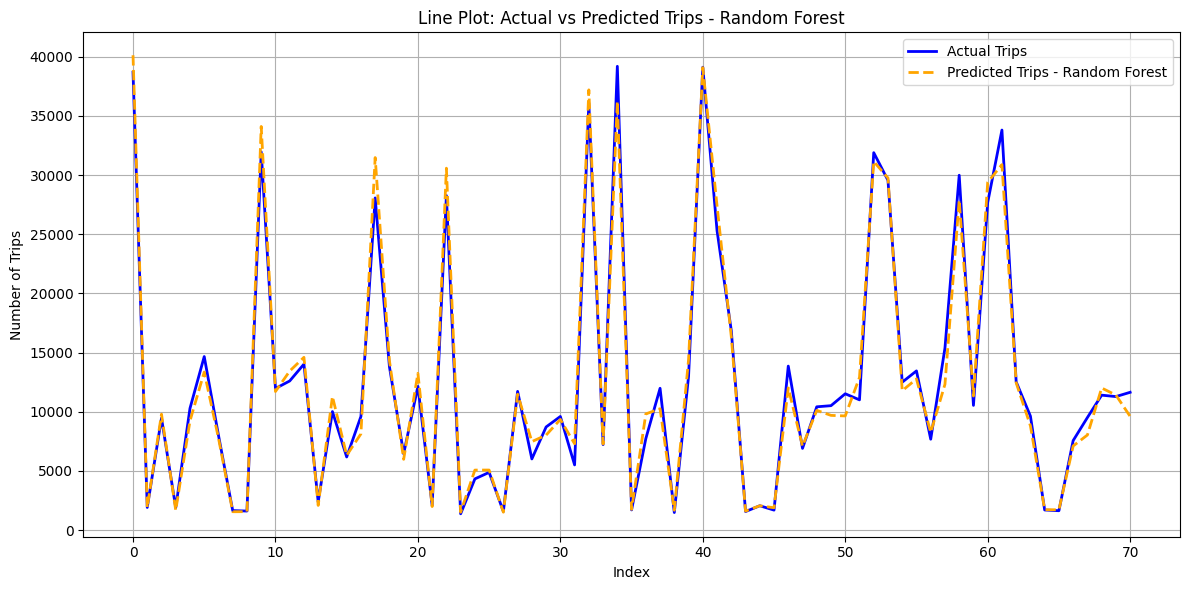

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure y_test and y_pred are pandas Series for alignment and sorting
# If they are NumPy arrays, convert them first
y_test_series = pd.Series(y_test).reset_index(drop=True)
y_pred_series = pd.Series(y_pred).reset_index(drop=True)

# Create a common index
index = range(len(y_test_series))

# Plot actual vs predicted values as lines
plt.figure(figsize=(12, 6))
plt.plot(index, y_test_series, label='Actual Trips', color='blue', linewidth=2)
plt.plot(index, y_pred_series, label='Predicted Trips - Random Forest', color='orange', linewidth=2, linestyle='--')

plt.xlabel("Index")
plt.ylabel("Number of Trips")
plt.title("Line Plot: Actual vs Predicted Trips - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


XGBoost MSE: 1326336.9959106923
XGBoost R² Score: 0.9876996874809265


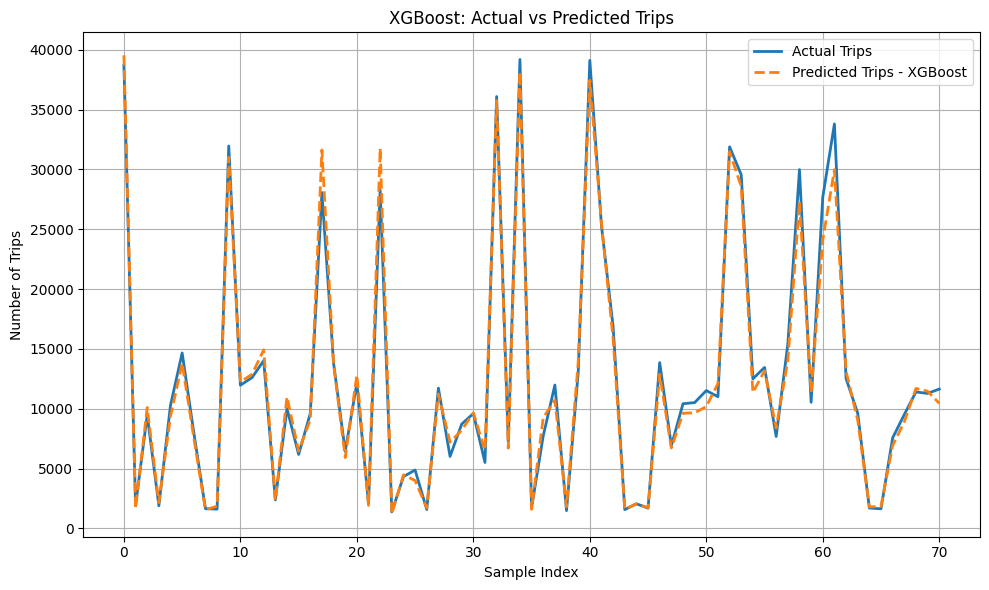

In [41]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)

# Evaluation
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("XGBoost MSE:", xgb_mse)
print("XGBoost R² Score:", xgb_r2)

# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Trips', linewidth=2)
plt.plot(xgb_pred, label='Predicted Trips - XGBoost', linewidth=2, linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("Number of Trips")
plt.title("XGBoost: Actual vs Predicted Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


GBRT MSE: 1310069.0231583943
GBRT R² Score: 0.9878505649881865


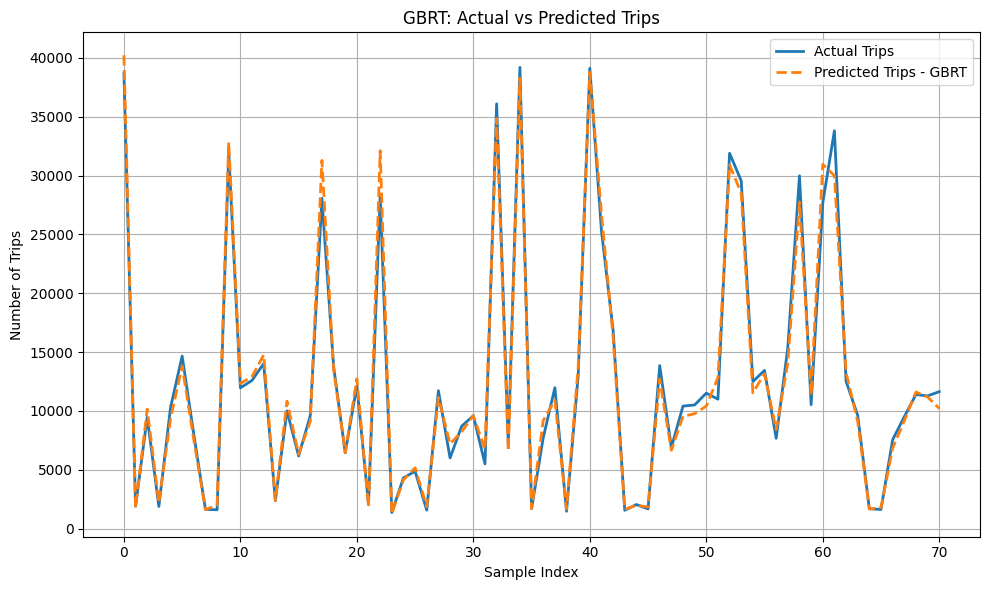

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

# GBRT model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Predict
gbr_pred = gbr_model.predict(X_test)

# Evaluation
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_r2 = r2_score(y_test, gbr_pred)
print("GBRT MSE:", gbr_mse)
print("GBRT R² Score:", gbr_r2)

# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Trips', linewidth=2)
plt.plot(gbr_pred, label='Predicted Trips - GBRT', linewidth=2, linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("Number of Trips")
plt.title("GBRT: Actual vs Predicted Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


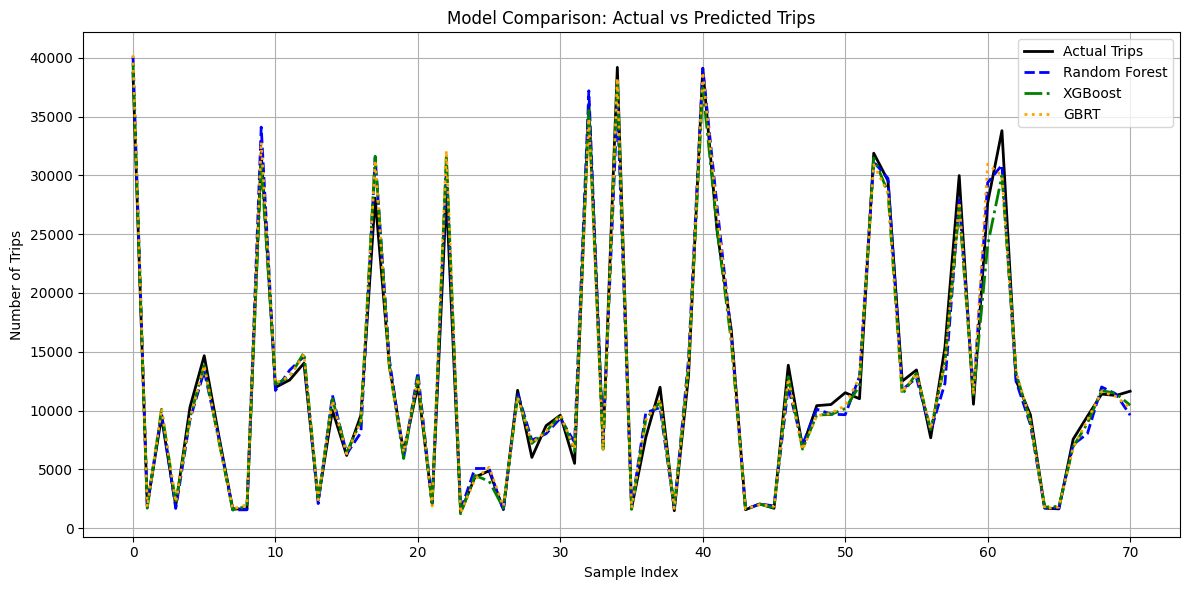

In [43]:
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y_test.values, label='Actual Trips', linewidth=2, color='black')

# Plot Random Forest predictions
plt.plot(y_pred, label='Random Forest', linestyle='--', linewidth=2, color='blue')

# Plot XGBoost predictions
plt.plot(xgb_pred, label='XGBoost', linestyle='-.', linewidth=2, color='green')

# Plot GBRT predictions
plt.plot(gbr_pred, label='GBRT', linestyle=':', linewidth=2, color='orange')

plt.xlabel("Sample Index")
plt.ylabel("Number of Trips")
plt.title("Model Comparison: Actual vs Predicted Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"\n{name} Model Performance:")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.4f}")
    print(f"MAPE : {mape:.2%}")

# Evaluate each model
evaluate_model("Random Forest", y_test, y_pred)
evaluate_model("XGBoost", y_test, xgb_pred)
evaluate_model("GBRT", y_test, gbr_pred)



Random Forest Model Performance:
MAE  : 898.22
RMSE : 1248.15
R²   : 0.9856
MAPE : 7.88%

XGBoost Model Performance:
MAE  : 790.57
RMSE : 1151.67
R²   : 0.9877
MAPE : 7.34%

GBRT Model Performance:
MAE  : 790.54
RMSE : 1144.58
R²   : 0.9879
MAPE : 7.16%


In [45]:
from sklearn.metrics import r2_score

# Calculate R² for each model
rf_accuracy = r2_score(y_test, y_pred)
xgb_accuracy = r2_score(y_test, xgb_pred)
gbr_accuracy = r2_score(y_test, gbr_pred)

print(f"Random Forest Accuracy (R² Score): {rf_accuracy:.4f}")
print(f"XGBoost Accuracy (R² Score):       {xgb_accuracy:.4f}")
print(f"GBRT Accuracy (R² Score):          {gbr_accuracy:.4f}")


Random Forest Accuracy (R² Score): 0.9856
XGBoost Accuracy (R² Score):       0.9877
GBRT Accuracy (R² Score):          0.9879


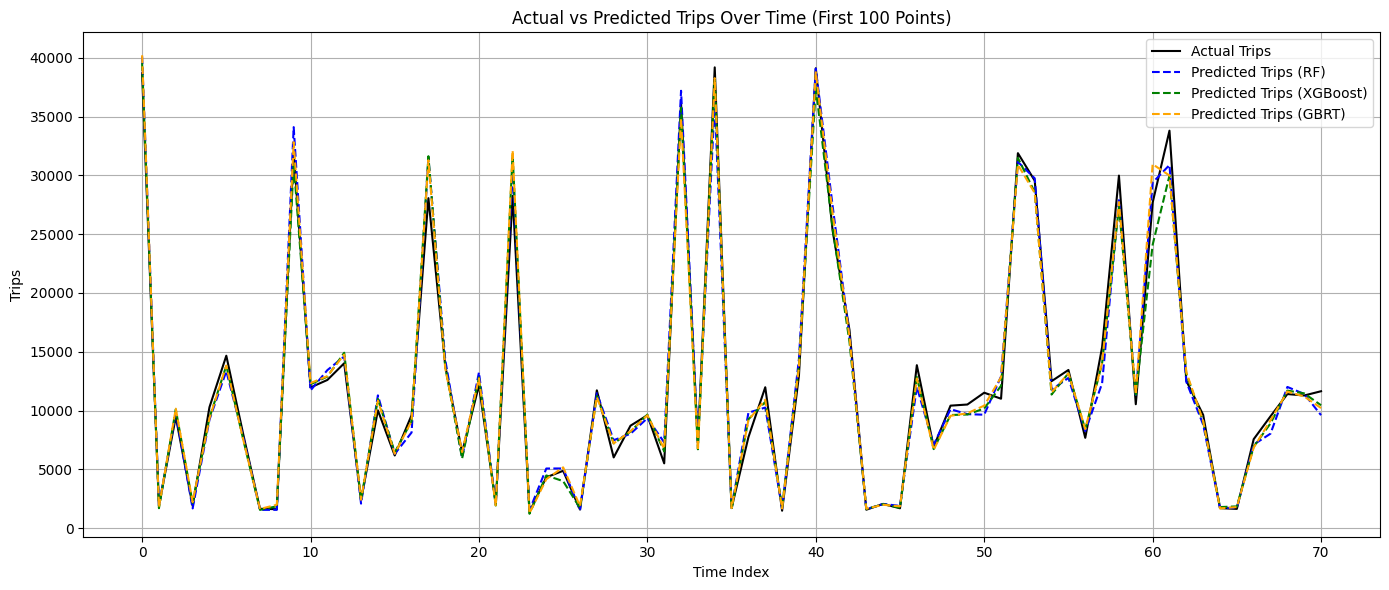

In [46]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:100], label='Actual Trips', linestyle='-', color='black')
plt.plot(y_pred[:100], label='Predicted Trips (RF)', linestyle='--', color='blue')
plt.plot(xgb_pred[:100], label='Predicted Trips (XGBoost)', linestyle='--', color='green')
plt.plot(gbr_pred[:100], label='Predicted Trips (GBRT)', linestyle='--', color='orange')
plt.title("Actual vs Predicted Trips Over Time (First 100 Points)")
plt.xlabel("Time Index")
plt.ylabel("Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
